# OpenCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the OpenCV library and load an image as colored and as grayscale.

The loaded image will be stored in a numpy array.

In a grayscale image, the pixel values are stored as 8 bits per pixel. Thus there are 256 levels (from 0 to 255). The larger the value, the brighter the pixel gets. (0 darkest, 255 brightest)

<class 'numpy.ndarray'>
(321, 377, 3)


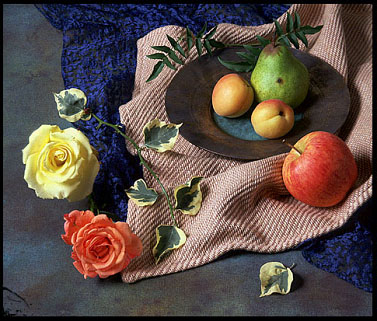

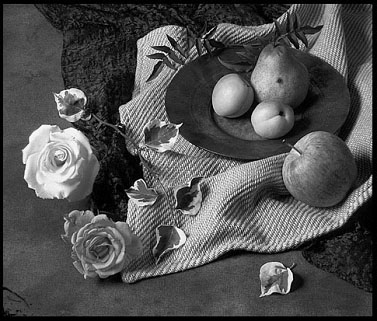


computation of histogram of the grayscale picture


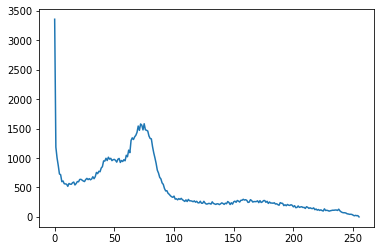

the largest pixel value in a grayscale image is  255
the smallest pixel value in a grayscale image is  0


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from numpy.lib.histograms import histogram

img = cv2.imread('/content/drive/MyDrive/Images/fruit.jpg')
# The pixels of the loaded image will be stored in a Numpy array
print(type(img))
# Images will be read as colored images as default, so RGB values are recorded in 3 matrix
print(img.shape)
cv2_imshow(img)

# The image can also be loaded in grayscale by using cv2.IMREAD_GRAYSCALE
img = cv2.imread('/content/drive/MyDrive/Images/fruit.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# Use cv.calcHist() function to find the histogram. 
"""
From OpenCV website:
    cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
    images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
    channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
    mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. 
    ranges : this is our RANGE. Normally, it is [0,256].
"""
print("\ncomputation of histogram of the grayscale picture")
histogram = cv2.calcHist([img] , [0] , None , [256] , [0,255])
plt.plot(histogram)
plt.show()

print("the largest pixel value in a grayscale image is ", np.max(img))
print("the smallest pixel value in a grayscale image is ",np.min(img))

# Thresholding Operation

**Thresholding Operation** is an example of point level operation which means the intensity of a pixel in the output image is computed based on only a point in the input image

If the pixel value is larger than threshold n, set it to 255.

If the pixel value is smaller or equal to threshold n, set it to 0.

When the threshold is 127 (half way between 0 and 255


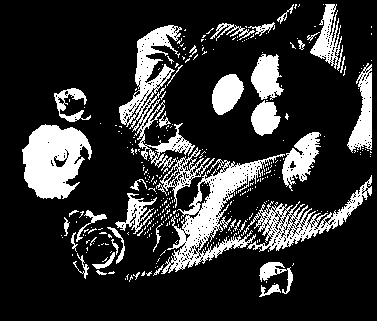

When the threshold is 50


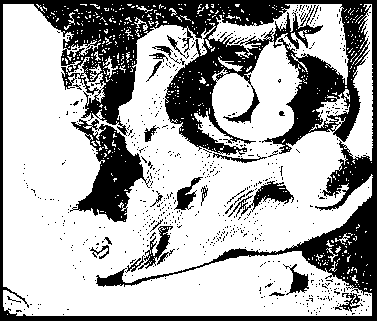

When the threshold is 200


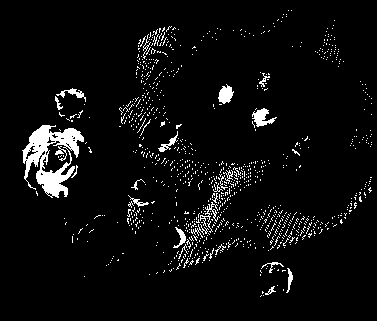

In [ ]:
print("When the threshold is 127 (half way between 0 and 255")
threshold = 127
img_copy = np.where(img > threshold, 255, 0)
cv2_imshow(img_copy)
img_copy = np.float32(img_copy)

print("When the threshold is 50")
threshold = 50
img_copy = np.where(img > threshold, 255, 0)
cv2_imshow(img_copy)

print("When the threshold is 200")
threshold = 200
img_copy = np.where(img > threshold, 255, 0)
cv2_imshow(img_copy)


# Discrete Convolution

In [ ]:
# 2D Convolution, assuming padding = 0
def convolution_2D(image, kernel):

  # In the digital image space, i points downward and j points to the right 
  
  # size of the input image
  image_size_i = int(image.shape[0])
  image_size_j = int(image.shape[1])

  # size of the kernel 
  kernel_size_i = int(kernel.shape[0])
  kernel_size_j = int(kernel.shape[1])

  # sizes of the output image
  output_size_i = image_size_i - kernel_size_i + 1
  output_size_j = image_size_j - kernel_size_j + 1
  output = np.zeros((output_size_i, output_size_j))

  # compute output's pixel through computing convolution
  for i in range(image_size_i):
    for j in range(image_size_j):
      if i > image_size_i - kernel_size_i or j > image_size_j - kernel_size_j:
        continue
      else:
        output[i,j] = (kernel * image[i: i + kernel_size_i, j: j + kernel_size_j]).sum()

  return output

# Mean Filter


Produce noise reduction, but at the expense of loss of image details. 

In [ ]:
# Function to apply the mean filter to an image, the default mean filter kernel is set to 3 x 3
def Mean_Filter(image, kernal_length = 3):
  mean_filter_kernel = np.ones((kernal_length, kernal_length)) / (kernal_length ** 2)
  output = convolution_2D(image, mean_filter_kernel)
  return output

Sample 3 x 3 mean filter kernel is 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Original picture


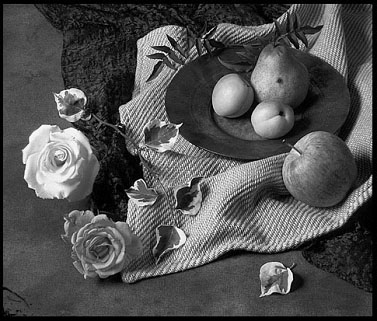



After apply 7 x 7 mean filter


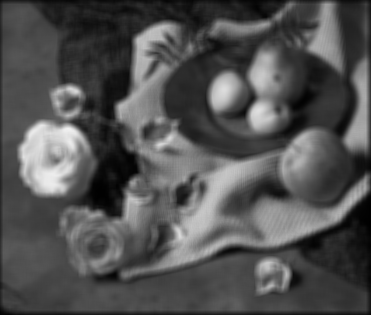

In [ ]:
print("Sample 3 x 3 mean filter kernel is \n", np.ones((3, 3)) / (3 ** 2))
print("\n")

# Test on the mean filter
img = cv2.imread('/content/drive/MyDrive/Images/fruit.jpg', cv2.IMREAD_GRAYSCALE)
print("Original picture")
cv2_imshow(img)
print("\n")

img_copy = Mean_Filter(img, 7)
print("After apply 7 x 7 mean filter")
cv2_imshow(img_copy)

Original picture with gaussian noise


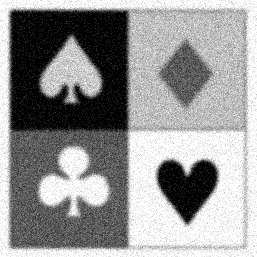



After apply 11 x 11 mean filter


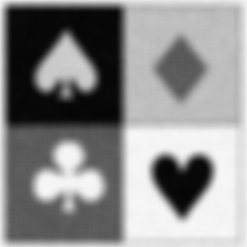

In [ ]:
# Test on the mean filter using a image with Gaussian noise
img = cv2.imread('/content/drive/MyDrive/Images/Gaussian_noise_image.png', cv2.IMREAD_GRAYSCALE)
print("Original picture with gaussian noise")
cv2_imshow(img)
print("\n")

img_copy = Mean_Filter(img, 11)
print("After apply 11 x 11 mean filter")
cv2_imshow(img_copy)

# Median Filter


In [ ]:
# Function to apply the median filter to an image, the default mean filter kernel is set to 3 x 3
def Median_Filter(image, kernal_length = 3):

  # In the digital image space, i points downward and j points to the right 

  # size of the input image
  image_size_i = int(image.shape[0])
  image_size_j = int(image.shape[1])

  # size of the kernel 
  kernel_size_i = kernal_length
  kernel_size_j = kernal_length

  # sizes of the output image
  output_size_i = image_size_i - kernel_size_i + 1
  output_size_j = image_size_j - kernel_size_j + 1
  output = np.zeros((output_size_i, output_size_j))

  # compute each output image's pixel through finding median of the image area
  for i in range(image_size_i):
    for j in range(image_size_j):
      if i > image_size_i - kernel_size_i or j > image_size_j - kernel_size_j:
        continue
      else:
        output[i,j] = np.median(image[i: i + kernel_size_i, j: j + kernel_size_j])
  return output

Original picture


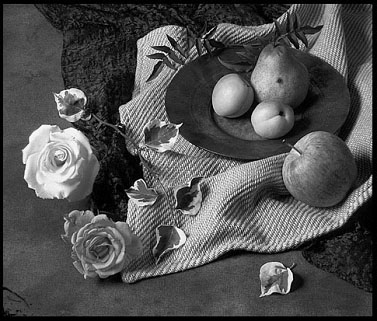



After apply 7 x 7 median filter


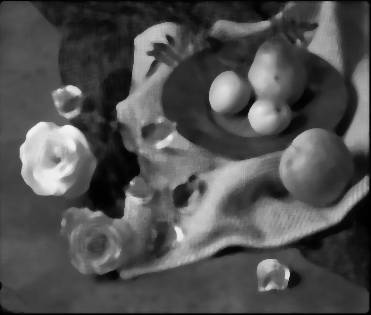

In [ ]:
# Test on the median filter
img = cv2.imread('/content/drive/MyDrive/Images/fruit.jpg', cv2.IMREAD_GRAYSCALE)
print("Original picture")
cv2_imshow(img)
print("\n")

img_copy = Median_Filter(img, 7)
print("After apply 7 x 7 median filter")
cv2_imshow(img_copy)

Original picture with gaussian noise


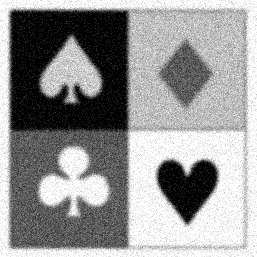



After apply 11 x 11  filter


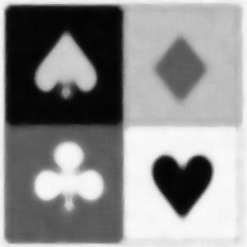

In [ ]:
# Test on the mean filter using a image with Gaussian noise
img = cv2.imread('/content/drive/MyDrive/Images/Gaussian_noise_image.png', cv2.IMREAD_GRAYSCALE)
print("Original picture with gaussian noise")
cv2_imshow(img)
print("\n")

img_copy = Median_Filter(img, 11)
print("After apply 11 x 11  filter")
cv2_imshow(img_copy)

# Gaussian Noise and Gaussian Filter

In [ ]:
# Generate gaussian noise to an image
def generate_gaussian_noise(image, mean = 0, standard_deviation = 15):
  noise = np.random.normal(mean, standard_deviation, size = image.shape)
  image_noisy = image + noise
  return image_noisy

Original picture


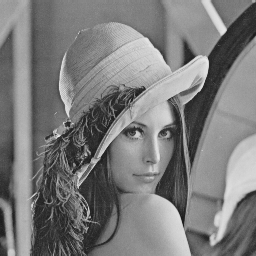



After generating gaussian noise on the image


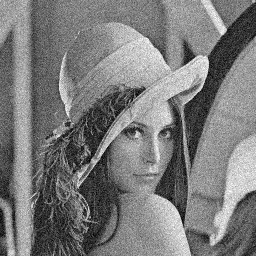

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Images/lena.png', cv2.IMREAD_GRAYSCALE)
print("Original picture")
cv2_imshow(img)
print("\n")

img_copy = generate_gaussian_noise(img)
print("After generating gaussian noise on the image")
cv2_imshow(img_copy)

In [ ]:
def Gaussian_Filter(kernal_length = 3, mean = 0, standard_deviation = 15):
  output = np.zeros((kernal_length, kernal_length))
  mid = kernal_length // 2 - 1

  for i in range(kernal_length):
    for j in range(kernal_length):
      output[i][j] = np.exp( ( (i-mid)**2 + (j-mid)**2)  / (2 * standard_deviation**2) )
  
  return output